# ANALISI SULLA QUALITA' DELLA VITA NEI PAESI DEL MONDO

Il progetto deve essere così formato: 

- Introduzione: definire il problema affrontato, le principali domande di analisi dei dati e dire perchè questo progetto può essere interessante

- Dati: descrivere i dati utilizzati per il progetto

- Analisi: analizzare i dati utilizzano gli strumenti e gli algoritmi appropriati, riportando considerazioni sia qualitative che quantitative. Descrivere gli algoritmi utilizzati o progettati e discutere i risultati ottenuti

- Conclusioni: riportare le conclusioni tratte dal progetto



## INTRODUZIONE

La qualità della vita di tutti i giorni non può essere mai descritta con un numeretto o con una singola parola per ognuno di noi, ma tuttavia è abbastanza intuitivo capire che il come viviamo, il come scorre il tempo nel luogo in cui stiamo, dipende da diversi fattori che facilmente influenzano le nostra abitudini. Ci chiediamo spesso se il posto in cui viviamo è quello giusto per noi, se esistono altri posti nel mondo in cui potremmo trovare la nostra confort zone. Ci chiediamo inoltre se la nostra vita sta migliorando anno dopo anno, se il nostro paese sta attuando cambiamenti che influenzano in un qualche modo la vita del popolo etc...

L'obiettivo di questo progetto è proprio quello di analizzare indici che influenzano la qualità della vita in un paese, analizzare quali nazioni sono le migliori in determinati indici, quali stanno evolvendo nel corso degli anni etc...

Questo progetto può risultare utile nel capire in quali nazioni si vive meglio, in quali nazioni determinati indici sono ottimi o sono critici o capire quali fattori migliorare o stanno migliorando nel passare degli anni nelle varie nazioni, capendo la correlazioNe che c'è tra certi fattori e la qualità della vita

Il progetto si pone come obiettivo anche quello di cercare di prevedere quali saranno i futuri indici di qualità della vita e quale sarà la qualità della vita in determinate nazioni in base a determinati parametri



## ANALISI DEL DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## ANALISI EDA (EXPLORATIV DATA ANALYSIS) SUL DATASET


Questo dataset contiene indici di qualità della vita per vari paesi dal mondo estratti tramite uno script dal sito web Numbeo , sito che fornisce informazioni aggiornate riguardo le condizioni di vita nelle varie parti del mondo (costo della vita, situazione sanitaria, inquinamento etc...)
Nel dataset troveremo ogni riga che esprime i vari parametri per ogni nazione e per l’anno analizzato. Le colonne del dataset sono:
- **Ranking**:  il ranking globale della nazione in quell'anno, basato sull’indice di qualità della vita 
- **Nazione**: il nome della nazione
- **Indice di qualità di vita**: un indice composto che valuta in totale la qualità della vita nella nazione
- **Purchasing power index**: misura il potere di acquisto relativo ad un consumatore
medio rispetto a New York, base=100
- **Indice di sicurezza**: misura la sicurezza in quella nazione (un indice alto indica un ambiente più sicuro)
- **Indice di sanità**: indice della qualità e della accessibilità alla sanità in un paese
- **Costo della vita**: misura i costi della vita (rispetto a New York, base = 100)
- **Property price**: confronta l’accessibilità economica degli immobili dividendo il
prezzo medio delll’immobile per il reddito medio nella nazione
- **Tempo speso nel traffico**:  il tempos medio speso a causa del traffico
- **Indice di inquinamento**: il livello di inquinamento generale nella nazione
- **Indice climatico**: condizioni climatiche per la nazione (higher = più alto)
- **Anno**: anno dove le metriche sono state estratte

In [2]:

data = pd.read_csv("./quality_of_life_indices_by_country.csv")
data.info()
# print(data.isnull().sum())  # non ci sono valori mancanti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 
dtypes: float64(8), int64(1), object(3)

Il dataset ha **1495 entries** e nessuna presenta valorI *Null*. 

#### PRIME 20 RIGHE DEL DATASET: 

In [3]:

#data.drop("Climate Index",axis=1,inplace=True)
data.head(20)


,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015
5,6,Denmark,190.2,105.7,74.3,79.3,100.6,5.0,27.8,31.8,-,2015
6,7,Austria,182.6,104.6,73.8,78.4,76.9,9.6,25.9,34.0,-,2015
7,8,Australia,180.8,110.4,57.8,71.9,99.3,7.1,36.2,21.6,-,2015
8,9,Canada,177.6,105.1,62.5,69.6,81.8,5.5,38.9,27.3,-,2015
9,10,New Zealand,175.5,91.0,60.2,72.6,93.7,5.8,28.1,17.6,-,2015


#### ANALISI STATISTICA UNIVARIATA

Alcuni dei valori medi degli indici tra le varie nazioni nel periodo 2014/2024:

In [4]:

stats = data.describe()
index = ['mean','min','max']
stats.loc[index]

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
mean,38.733779,134.156656,66.804615,60.104682,65.211037,53.440401,12.876856,35.792508,52.431237
min,1.000000,-53.000000,3.300000,14.700000,28.300000,17.600000,2.600000,11.800000,11.500000
max,87.000000,285.800000,210.000000,88.100000,88.400000,138.200000,202.100000,65.200000,96.600000


In [ ]:
# data_grouped_by_year = data.groupby("Year").describe()
# data_grouped_by_year.reset_index(inplace=True)
# Questo lo potrei plottare per vedere come negli anni se si è alzato o abbassato l'indice di qualità della vita



##### ANLISI VARIAZIONE DEL RANKING NEGLI ANNI DELLE VARIE NAZIONI

Come si stanno evolvendo le top nazioni d'europa negli Anni?

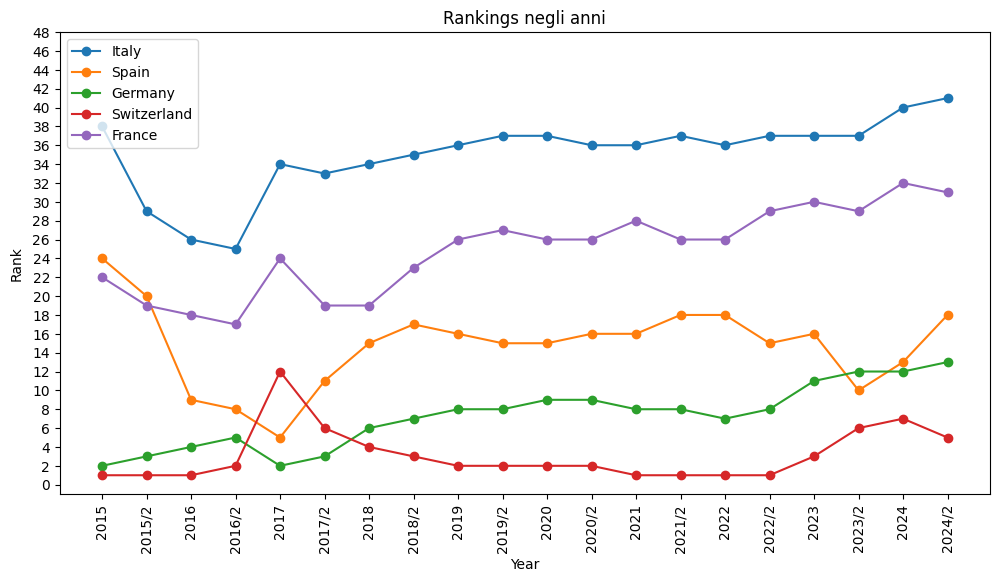

In [ ]:
nations = ['Italy', 'Spain', 'Germany','Switzerland','France']

def plot_nations_rank_during_year(data,nations):
    plt.figure(figsize=(12,6))
    for n in nations:
        new_data = data.where((data['Country'].astype(str)==n)).dropna()
        plt.plot(new_data['Year'],new_data['Rank'],label=n, marker='o' )
      
      
    plt.title("Rankings negli anni")
    plt.xlabel('Year')
    plt.ylabel("Rank",labelpad=6.0)
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0,50,2)) 
    plt.legend()
    plt.show()


plot_nations_rank_during_year(data,nations)
   
# posso qui vedere cosa è successo nel 2016
# posso vedere tutti quelli che hanno ranking basso che parametri in comune hanno
# posso confrontare con altre nazioni
# posso fare regressione per vedere previsto ranking in base a determinati parametri

Notiamo che:

L'**Italia** negli anni ha migliorato la sua posizione in classifica, così come la Francia e la Germania. La Spagna ha avuto una leggiore flessione tra il 2022 ed il 2023 (a causa di cosa?), mentre la Svizzera è sempre stata nelle prime posizioni della classifica. 

Da questo plot notimao che L'Italia non è mai stata in classifica sopra queste top 5 potenze europee analizzate.

Come si stanno evolvendo i vari indici negli anni in Italia?

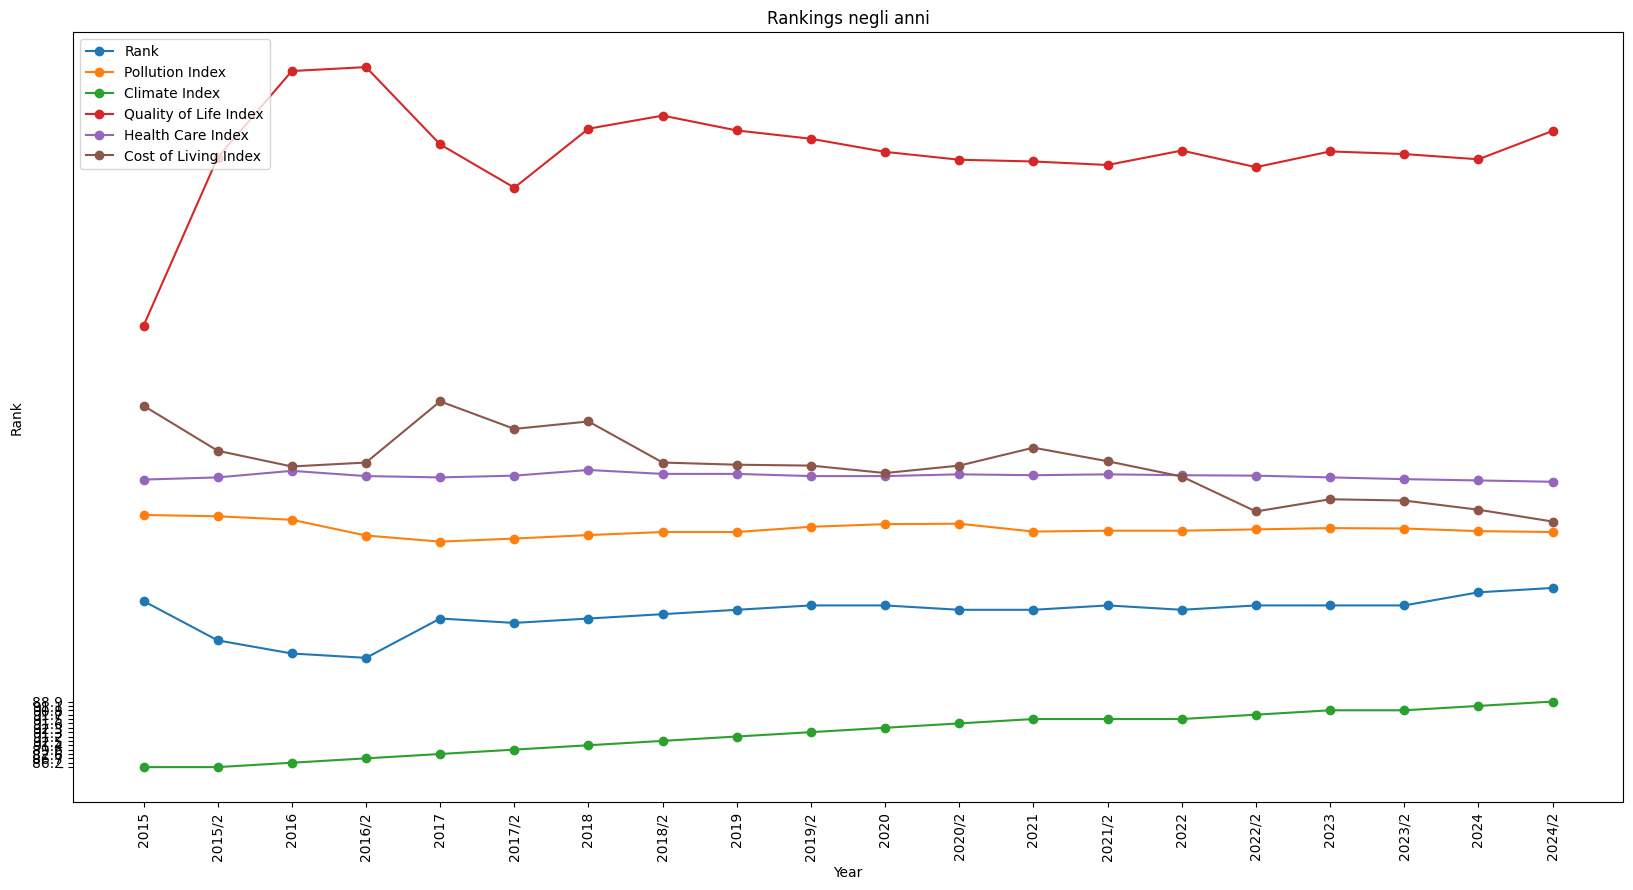

In [ ]:
italy_data = data.where((data['Country'].astype(str)=='Italy')).dropna()
plt.figure(figsize=(20,10))
   
# Plotto solo alcuni degli indici più importanti
#ylabel = ['Rank','Traffic Commute Time Index','Pollution Index','Climate Index', 'Quality of Life Index', 'Purchasing Power Index','Safety Index','Health Care Index','Cost of Living Index','Property Price to Income Ratio']
ylabel = ['Rank','Pollution Index','Climate Index', 'Quality of Life Index','Health Care Index','Cost of Living Index']

for y in ylabel:
    plt.plot(italy_data['Year'],italy_data[y],label=y, marker='o' )


plt.title("Rankings negli anni")
plt.xlabel('Year')
plt.ylabel("Rank",labelpad=6.0)
plt.xticks(rotation=90)
plt.legend()
plt.show()


# supergiù tutti gli indici continuano a rimanere nella media
# è diminuito il costo della vita e questo può essere un motivo del perchè è salito in classifica l'italia

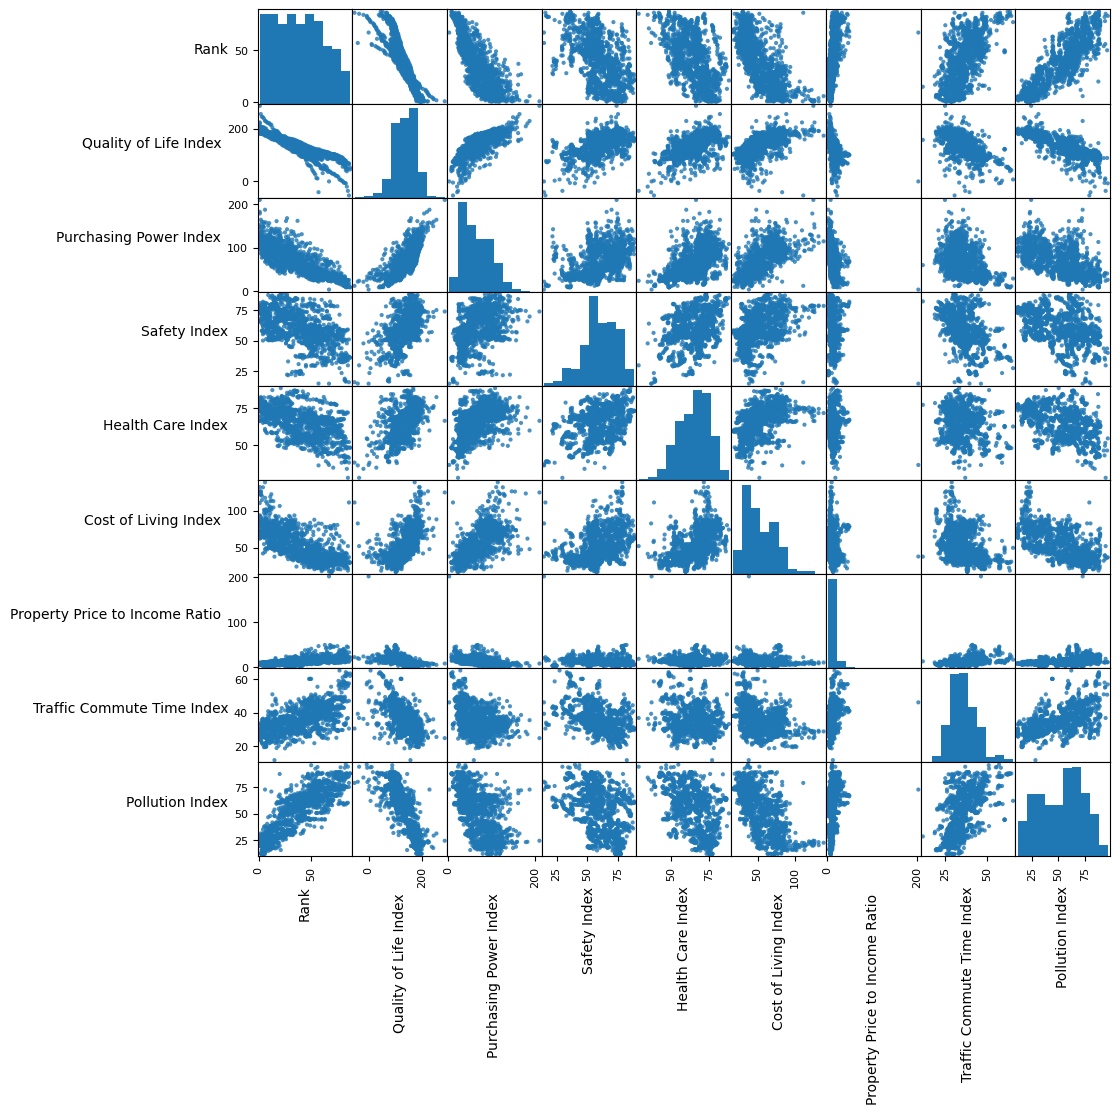

In [ ]:
########### ANALISI MULTIVARIATA


### analisi della correlazione, nel comprendere
### le relazoioni ta diverse variabili nel dataset, ovvero come tendono a variare 'una rispetto all altra

axes = pd.plotting.scatter_matrix(data,figsize=(11,11),alpha=0.8)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

# abbiamo nelle varie cose la relazione tra due variabili
#nella diagonale vediamo la distribuzione tramite istogrammi dei dati delle varie variabili



Da questa scatter matrix notiamo che c'è certamente correlazione tra alcune variabili.

Ad esempio il ranking come notiamo è fortemnte correlato a qualsiasi delle altre variabili.


Utilizziamo l'indice di correlazione di Pearson per capire tra quali variabili c'è una forte correlazione


In [29]:
index = ['Country','Rank','Climate Index','Year']
data_without_qualitative_value = data.drop(index, axis=1)
data_without_qualitative_value.corr(method='pearson')

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
Quality of Life Index,1.000000,0.779720,0.532045,0.552464,0.607517,-0.497310,-0.608260,-0.812679
Purchasing Power Index,0.779720,1.000000,0.423047,0.524878,0.701612,-0.413017,-0.389116,-0.597118
Safety Index,0.532045,0.423047,1.000000,0.384079,0.391775,-0.092799,-0.474271,-0.395983
Health Care Index,0.552464,0.524878,0.384079,1.000000,0.518272,-0.112484,-0.197911,-0.479726
Cost of Living Index,0.607517,0.701612,0.391775,0.518272,1.000000,-0.209981,-0.361445,-0.636214
Property Price to Income Ratio,-0.497310,-0.413017,-0.092799,-0.112484,-0.209981,1.000000,0.370211,0.352226
Traffic Commute Time Index,-0.608260,-0.389116,-0.474271,-0.197911,-0.361445,0.370211,1.000000,0.567086
Pollution Index,-0.812679,-0.597118,-0.395983,-0.479726,-0.636214,0.352226,0.567086,1.000000


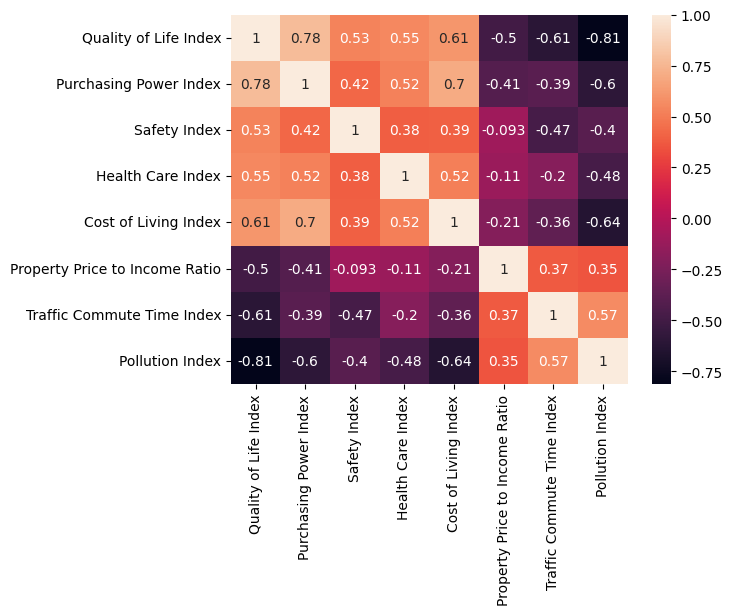

In [ ]:

sns.heatmap(data_without_qualitative_value.corr(), annot=True) #annot=True serve a stampare i valori di correlazione
plt.show()


# dire quali variabili hanno correlazione forte, quali debole e quali moderata

Alcune cose che notiamo qui:

- ovviamente il pollution index e la qualità della vita sono fortemente anti correlate
- la qualità della vita è correlata con il prezzo di acquisto degli immobili e con il costo della vita
- l'indice di inquinamento è correlato con il tempo medio impiegato in mezzo al traffico

Tutte queste sono osservazioni banali ma che ci confermano come alcuni degli attriuti dipendono l'uno dall'altro

In [23]:
data_grouped_by_year['Quality of Life Index']

,count,mean,std,min,25%,50%,75%,max
0,86.0,91.476744,62.879660,-53.0,43.825,90.90,138.475,222.9
1,57.0,139.894737,72.305886,-40.7,93.700,139.50,193.400,285.8
2,56.0,146.841071,40.613776,63.8,113.575,155.15,177.950,208.5
3,61.0,140.995082,41.567349,31.5,114.900,148.90,172.700,201.5
4,67.0,134.323881,41.826670,0.0,103.850,142.50,167.050,190.4
5,56.0,135.367857,29.784914,78.5,114.900,140.25,158.375,180.1
6,60.0,145.965000,32.126165,81.1,122.550,150.05,174.150,197.7
7,66.0,146.071212,32.601245,84.6,121.375,152.60,174.350,199.9
8,71.0,142.311268,32.931416,84.0,113.000,145.70,169.050,198.6
9,77.0,137.597403,34.289130,69.3,110.000,135.70,164.400,196.5


In [ ]:
# poi posso fare regressione per prevedere classifica o gol fatti (come facevo TAP)
# o allenare un modello 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Seleziona le colonne di input (escludendo 'Rank' e altre non numeriche)
from sklearn.preprocessing import StandardScaler

# Seleziona solo le colonne numeriche da standardizzare
numeric_columns = ['Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 
                   'Health Care Index', 'Cost of Living Index', 'Property Price to Income Ratio', 
                   'Traffic Commute Time Index', 'Pollution Index']

scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numeric_columns] = scaler.fit_transform(data[numeric_columns])


X = data_standardized.drop(['Rank','Country','Climate Index','Year'], axis=1)  #variabili indipendenti
y = data_standardized['Rank']   # variabile dipendente

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


# Dividi i dati in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Inizializza e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Predici i valori di ranking sul set di test
y_pred = model.predict(X_test)

# Valuta il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)   # 1- rss/tss

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


# da cui capisco che forse la regressione lineare non è il modello migliore e cerco altre soluzioni

Mean Squared Error: 41.52194673724402
R^2 Score: 0.9149566902851599


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Inizializza e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Predici i valori di ranking sul set di test
y_pred = model.predict(X_test)

# Valuta il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)   # 1- rss/tss

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


# ancora peggio

# farlo con la regressione logistica seguendo il tutorial che fa il professore


Mean Squared Error: 30.300516424994527
R^2 Score: 0.9379398991295598


In [22]:
# Esempio di predizione per nuovi dati
new_data = [[222.9, 146.5, 73.2, 66.3, 126,7.3,25.6,24.1]]  # Sostituisci con i tuoi valori 222.9	146.5	73.2	66.3	126.0	7.3	25.6	24.1
predicted_rank = model.predict(new_data)
print(f"Predicted Rank: {predicted_rank[0]}")

Predicted Rank: -6.281102127565703


/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


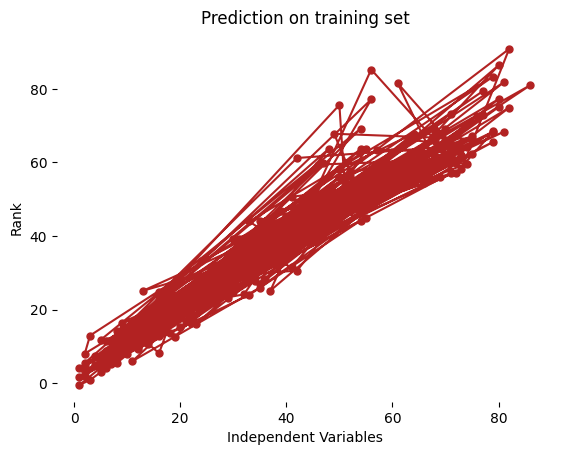

In [19]:
# plotto valori previsti vs valori reali
# Prediction on training set

plt.plot(y_test, y_pred, color = 'firebrick',marker='o', markersize=5, label = 'X_train/Pred(y_test)')
plt.title('Prediction on training set')
plt.xlabel('Independent Variables')
plt.ylabel('Rank')
#plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# faccio classificazione o qualche altra analisis

## CONCLUSIONI

Le conclusioni che sono uscite da questo progetto